# Radar phase

This notebook demonstrates how phase of EM radiation can be used by radars.

First, let's plot some waves. You can change the wavelength, phase and amplitude by altering the numbers on the first three lines (Amplitude **A**, wavelength **l** and phase **p**). To plot the wave, click on the cell and press the **Run** button at the top of the page.

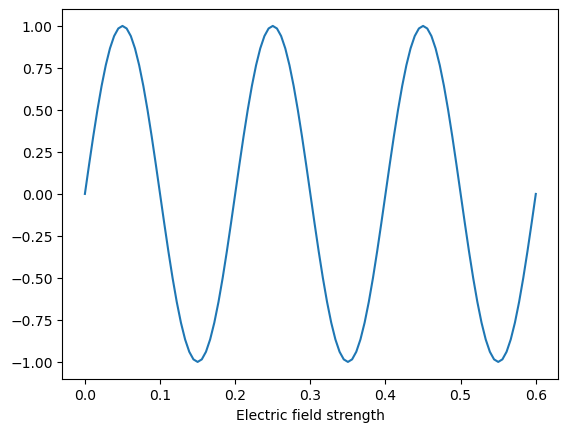

In [9]:
# the properties of the wave
A=1.0   # amplitude
l=0.2   # wavelength in metres
p=0.0   # phase in degrees


# python code below. Do not modify.
import numpy as np
from math import pi
from matplotlib import pyplot as plt

def makeWave(A,l,p):
  '''make arrays of data'''
  c=2.998*10**8
  x=np.arange(0,l*3,l/36)
  y=A*np.sin(x*2*pi/l+p*pi/180)
  return(x,y)


def plotOneWave(x,y):
  plt.plot(x,y)
  plt.xlabel("Distance (m)")
  plt.xlabel("Electric field strength")
  plt.show()
    
x,y=makeWave(A,l,p)
plotOneWave(x,y)

## Interference

Now we will make two waveforms and interfere them. The two waves have the properties A1, l1, p1 and A3, l2 and p2.

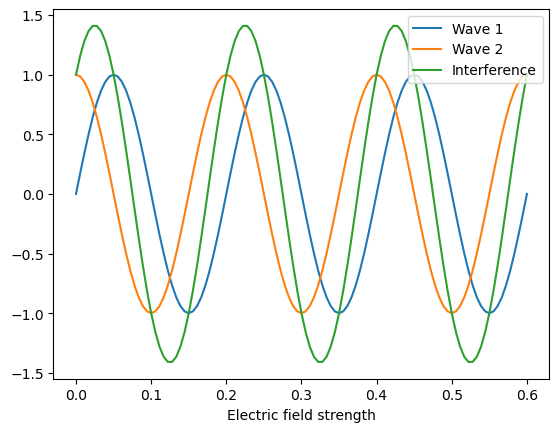

In [17]:
# the properties of  wave 1
A1=1.0   # amplitude
l1=0.2   # wavelength in metres
p1=0.0   # phase in degrees

# the properties of  wave 2
A2=1.0   # amplitude
l2=0.2   # wavelength in metres
p2=90.0  # phase in degrees


# make the two waves
x1,y1=makeWave(A1,l1,p1)
x2,y2=makeWave(A2,l2,p2)

# interfere them
yI=y1+y2


# plot all three
def plotThreeWaves(x,y1,y2,y3):
  plt.plot(x,y1,label='Wave 1')
  plt.plot(x,y2,label='Wave 2')
  plt.plot(x,y3,label='Interference')
  plt.xlabel("Distance (m)")
  plt.xlabel("Electric field strength")
  plt.legend()
  plt.show()

    
plotThreeWaves(x,y1,y2,yI) 